<div style="background: #DDE2FF;
            font-family: Bookerly;
            font-size: 14px; 
            font-weight: 500;
            padding: 30px 5px 30px 5px; 
            border: 30px solid #DDE2FF; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>(Custom CSS files are not reliable for controlling Jupyter font style. To establish the same appearance as the original notebook, depend on the browser to control the font, by setting the desired font faces in the browser settings. For example, Chrome 135 or Firefox 134 can do this. In this notebook series, Bookerly font is for markdown and Monaco is for code.)
     
     
     

</font>                 
</div>

<div style="background: #DDE2FF;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 20px 5px 20px 5px; 
            border: 30px solid #DDE2FF; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>**Chapter 31-10 Method of Lines**.
 
 The method of lines (MOL, NMOL, NUMOL) is a technique for solving partial differential equations (PDEs) in which all but one dimension is discretized. By reducing a PDE to a single continuous dimension, the method of lines allows solutions to be computed via methods and software developed for the numerical integration of ordinary differential equations (ODEs) and differential-algebraic systems of equations (DAEs). Integration routines have been developed over the years in numerous programming languages.

The method of lines most often refers to the construction or analysis of numerical methods for partial differential equations that proceeds by first discretizing the spatial derivatives only and leaving the time variable continuous. This leads to a system of ordinary differential equations to which a numerical method for initial value ordinary equations can be applied. The method of lines in this context dates back to at least the early 1960s. <br><br>
     

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>The pde module py-pde is a quick Python add-in that is convenient in many situations. Its presence is assumed from the import statement in the example. From the py-pde docs:

3.1. Mathematical basics

To solve partial differential equations (PDEs), the py-pde package provides differential operators to express spatial derivatives. These operators are implemented using the finite difference method to support various boundary conditions. The time evolution of the PDE is then calculated using the *method of lines* by explicitly discretizing space using the grid classes. This reduces the PDEs to a set of ordinary differential equations, which can be solved using standard methods as described below.


</font>
</div>



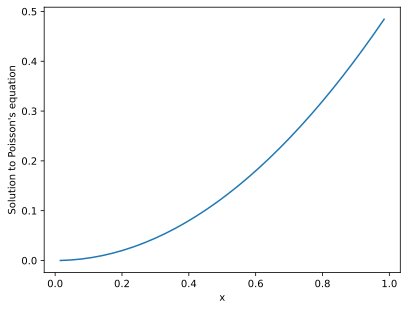

In [1]:
from pde import CartesianGrid, ScalarField, solve_poisson_equation
%config InlineBackend.figure_formats = ['svg']

grid = CartesianGrid([[0, 1]], 32, periodic=False)
field = ScalarField(grid, 1)
result = solve_poisson_equation(field, bc=[{"value": 0}, {"derivative": 1}])
result.plot()



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>A second py-pde example is shown below.


</font>
</div>

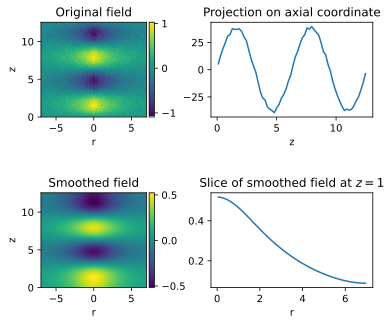

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_formats = ['svg']

from pde import CylindricalSymGrid, ScalarField

# create a scalar field with some noise
grid = CylindricalSymGrid(7, [0, 4 * np.pi], 64)
data = ScalarField.from_expression(grid, "sin(z) * exp(-r / 3)")
data += 0.05 * ScalarField.random_normal(grid)

# manipulate the field
smoothed = data.smooth()  # Gaussian smoothing to get rid of the noise
projected = data.project("r")  # integrate along the radial direction
sliced = smoothed.slice({"z": 1})  # slice the smoothed data

# create four plots of the field and the modifications
fig, axes = plt.subplots(nrows=2, ncols=2)
data.plot(ax=axes[0, 0], title="Original field")
smoothed.plot(ax=axes[1, 0], title="Smoothed field")
projected.plot(ax=axes[0, 1], title="Projection on axial coordinate")
sliced.plot(ax=axes[1, 1], title="Slice of smoothed field at $z=1$")
plt.subplots_adjust(hspace=0.8)
plt.show()



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Github does not invest sufficient time to process the above figure. At the risk of duplication, the figure will be repeated below.


</font>
</div>

<img src="fieldsPDE.svg" />

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>And a third example:


</font>
</div>

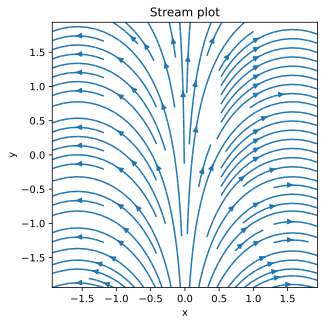

In [3]:
from pde import CartesianGrid, VectorField
%config InlineBackend.figure_formats = ['svg']

grid = CartesianGrid([[-2, 2], [-2, 2]], 32)
field = VectorField.from_expression(grid, ["sin(x)", "cos(x)"])
field.plot(method="streamplot", title="Stream plot")



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Method of Lines example. An evolution equation such as 

$$u_t\,=\,-uu_x\,+\,\mu u_{xx}$$

(referred to below as 'ref_eq,') can be recast as the expression

$$ut(t, x) = S[u],$$ 

where $S[u]$ is a functional of $u(t, x)$, which does not include t-derivatives of $u$. Here it
could be written explicitly as

$$S[u] = F(u(t, x), u_x(t, x), u_{xx}(t, x)) = −u u_x + \mu u_{xx}$$

The main point is that for any given $t$ the the right-hand side of 'ref_eq' can be computed if we
know the values of $u(t, x)$ for the same $t$ and all $x$.

The 'ref_eq' can be regarded as an infinite collection of ordinary differential equations,
one for each value of $x$, with $t$ as the independent variable and initial data furnished by

$$u(0,x)\,=\,f(x)\hspace{2 cm}a\,\leqq\,x\,\leqq\,b,$$

Further, the infinite set of $x$ is replaced with $a\,\leqq\,  x \,\leqq\, b$, by a representative finite
set, and the spatial derivatives by some discrete approximation. This is the method of
lines (MoL). This means that we can utilize the experience and techniques that have
already been acquired in the study of initial value problems for ordinary differential
equations.



</font>
</div>


<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>The example plot below is interactive immediately following the execution of its script.


</font>
</div>

<IPython.core.display.Javascript object>


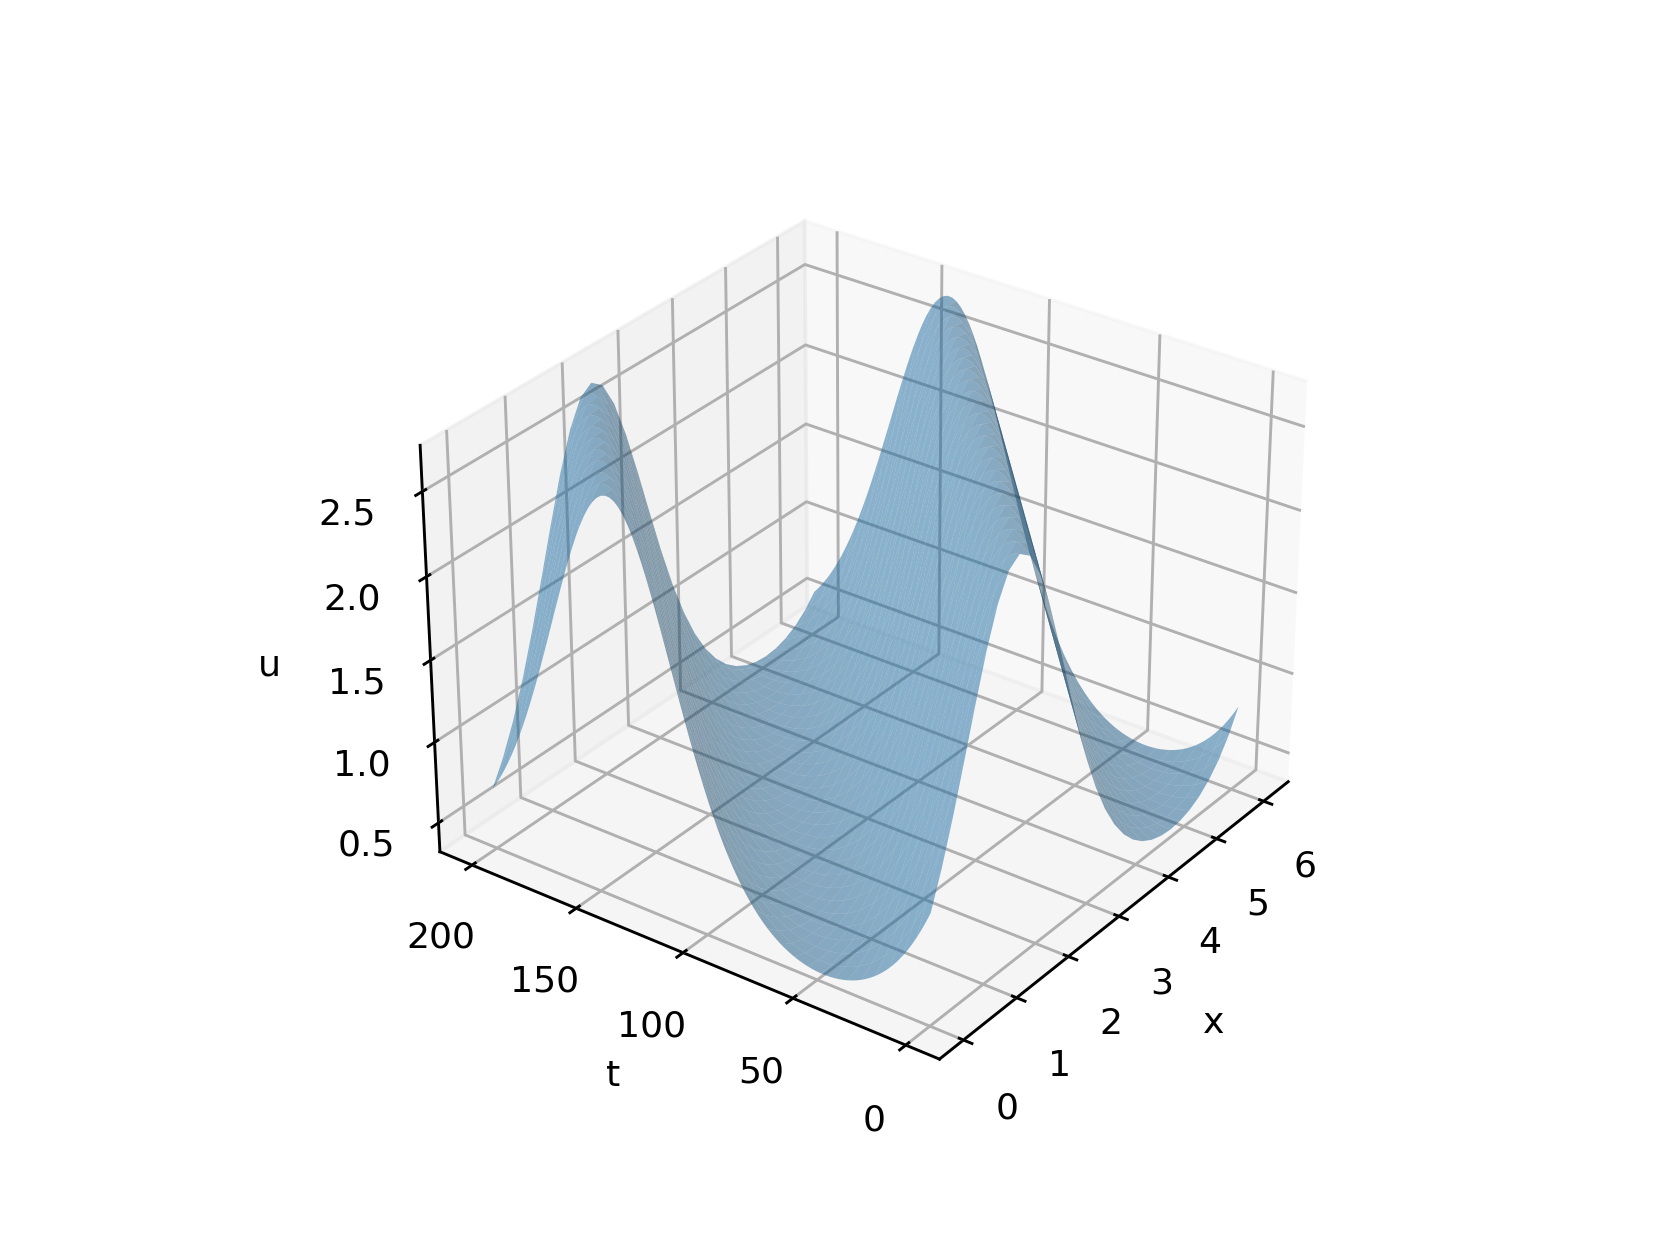

With 32 Fourier nodes the final error = 0.000106904


In [1]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
import numpy as np
from scipy.fftpack import diff
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#%config InlineBackend.figure_formats = ['svg']

def u_exact(t,x):
    """ Exact solution. """
    return np.exp(np.sin(x-2*np.pi*t))


def rhs(u, t):
    """ Return rhs. """
    return -2.0*np.pi*diff(u)

N=32
x=np.linspace(0,2*np.pi,N,endpoint=False)
u0=u_exact(0,x)
t_initial=0.0
t_final=64*np.pi
t=np.linspace(t_initial,t_final,101)
sol=odeint(rhs,u0,t,mxstep=5000)

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
t_gr,x_gr=np.meshgrid(x,t)
ax.plot_surface(t_gr,x_gr,sol,alpha=0.5)
ax.elev,ax.azim=47,-137
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')


u_ex=u_exact(t[-1],x)
err=np.abs(np.max(sol[-1,: ]-u_ex))
print("With %d Fourier nodes the final error = %g" % (N, err))

















